In [248]:
from chembl_webresource_client.new_client import new_client
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
%matplotlib inline

# Chembl

Here we download our dataset

In [8]:
df = pd.read_csv('chembl.csv')

/data/home/viktor_petukhov/local/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
molecule = new_client.molecule

In [4]:
molecule.all()[1500]

{'atc_classifications': [],
 'availability_type': '-1',
 'biotherapeutic': None,
 'black_box_warning': '0',
 'chebi_par_id': None,
 'chirality': '-1',
 'dosed_ingredient': False,
 'first_approval': None,
 'first_in_class': '-1',
 'helm_notation': None,
 'indication_class': None,
 'inorganic_flag': '-1',
 'max_phase': 0,
 'molecule_chembl_id': 'CHEMBL7322',
 'molecule_hierarchy': {'molecule_chembl_id': 'CHEMBL7322',
  'parent_chembl_id': 'CHEMBL7322'},
 'molecule_properties': {'acd_logd': '2.28',
  'acd_logp': '2.87',
  'acd_most_apka': '12.38',
  'acd_most_bpka': '7.77',
  'alogp': '3.02',
  'aromatic_rings': 2,
  'full_molformula': 'C20H25NO5',
  'full_mwt': '359.42',
  'hba': 6,
  'hba_lipinski': 6,
  'hbd': 2,
  'hbd_lipinski': 2,
  'heavy_atoms': 26,
  'molecular_species': 'NEUTRAL',
  'mw_freebase': '359.42',
  'mw_monoisotopic': '359.1733',
  'num_alerts': 3,
  'num_lipinski_ro5_violations': 0,
  'num_ro5_violations': 0,
  'psa': '77.02',
  'qed_weighted': '0.39',
  'ro3_pass': '

In [5]:
print("Properties: ", molecule.all()[1500]['molecule_properties'])

print("Structure: ", molecule.all()[1500]['molecule_structures'])

Properties:  {'hba_lipinski': 6, 'psa': '77.02', 'acd_most_apka': '12.38', 'num_alerts': 3, 'aromatic_rings': 2, 'acd_logd': '2.28', 'mw_monoisotopic': '359.1733', 'rtb': 10, 'acd_logp': '2.87', 'heavy_atoms': 26, 'num_lipinski_ro5_violations': 0, 'acd_most_bpka': '7.77', 'num_ro5_violations': 0, 'qed_weighted': '0.39', 'hba': 6, 'hbd_lipinski': 2, 'mw_freebase': '359.42', 'hbd': 2, 'molecular_species': 'NEUTRAL', 'full_molformula': 'C20H25NO5', 'alogp': '3.02', 'full_mwt': '359.42', 'ro3_pass': 'N'}
Structure:  {'standard_inchi_key': 'QRHJQXLPEOKPSF-UHFFFAOYSA-N', 'standard_inchi': 'InChI=1S/C20H25NO5/c1-14-6-4-5-7-17(14)26-20(23)16(22)13-21-11-10-15-8-9-18(24-2)19(12-15)25-3/h4-9,12,16,21-22H,10-11,13H2,1-3H3', 'canonical_smiles': 'COc1ccc(CCNCC(O)C(=O)Oc2ccccc2C)cc1OC'}


In [3]:
columns = list(molecule.all()[0]['molecule_properties'].keys()) + list(molecule.all()[0]['molecule_structures'].keys())

In [4]:
df = pd.DataFrame(columns=columns)

In [ ]:
/data/home/viktor_petukhov/libs/mgltools_source_1.5.6/MGLPACKS/AutoDockTools-1.5.6/AutoDockTools/Utilities24


In [ ]:
while True:
    for mol in tqdm_notebook(molecule.all()[df.shape[0]:]):


        id = mol['molecule_chembl_id']

        struct = mol['molecule_structures']
        prop = mol['molecule_properties']

        if not (struct and prop):
            continue

        full_info = pd.Series({**struct, **prop})

        df.loc[id] = full_info

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/data/home/viktor_petukhov/local/anaconda3/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/data/home/viktor_petukhov/local/anaconda3/lib/python3.5/site-packages/tqdm/_tqdm.py", line 147, in run
    if instance.miniters > 1 and \
AttributeError: 'tqdm_notebook' object has no attribute 'miniters'



In [11]:
df.shape

(332700, 28)

In [12]:
df = df.drop(['full_molformula', 'standard_inchi_key', 'standard_inchi'], axis=1)

In [13]:
df.to_csv('chembl.csv')

# Explore

In [ ]:
df.canonical_smiles.apply(len).describe()

In [ ]:
df.canonical_smiles

# Get activities

In [50]:
from chembl_webresource_client.new_client import new_client
target = new_client.target
activity = new_client.activity
herg = target.search('herg')[0]

In [21]:
ki = activity.filter(target_chembl_id=herg['target_chembl_id']).filter(standard_type="Ki")

In [43]:
IC50 = activity.filter(target_chembl_id=herg['target_chembl_id']).filter(standard_type="IC50")

In [46]:
len(IC50)

9859

In [47]:
len(ki)

2555

In [10]:
target.search('herg')[0]

{'organism': 'Homo sapiens',
 'pref_name': 'Maltase-glucoamylase',
 'species_group_flag': False,
 'target_chembl_id': 'CHEMBL2074',
 'target_components': [{'accession': 'O43451',
   'component_description': 'Maltase-glucoamylase, intestinal',
   'component_id': 434,
   'component_type': 'PROTEIN',
   'relationship': 'SINGLE PROTEIN',
   'target_component_synonyms': [{'component_synonym': 'MGA ',
     'syn_type': 'GENE_SYMBOL'},
    {'component_synonym': 'MGAML', 'syn_type': 'GENE_SYMBOL'},
    {'component_synonym': 'MGAM', 'syn_type': 'GENE_SYMBOL'},
    {'component_synonym': 'Maltase-glucoamylase, intestinal',
     'syn_type': 'UNIPROT'},
    {'component_synonym': 'Maltase', 'syn_type': 'UNIPROT'},
    {'component_synonym': 'Glucoamylase', 'syn_type': 'UNIPROT'},
    {'component_synonym': 'Alpha-glucosidase', 'syn_type': 'UNIPROT'},
    {'component_synonym': 'Glucan 1,4-alpha-glucosidase',
     'syn_type': 'UNIPROT'},
    {'component_synonym': '3.2.1.20', 'syn_type': 'EC_NUMBER'},
   

In [20]:
molecule.get('CHEMBL296397')

{'atc_classifications': [],
 'availability_type': '-1',
 'biotherapeutic': None,
 'black_box_warning': '0',
 'chebi_par_id': None,
 'chirality': '-1',
 'dosed_ingredient': False,
 'first_approval': None,
 'first_in_class': '-1',
 'helm_notation': None,
 'indication_class': None,
 'inorganic_flag': '-1',
 'max_phase': 0,
 'molecule_chembl_id': 'CHEMBL296397',
 'molecule_hierarchy': {'molecule_chembl_id': 'CHEMBL296397',
  'parent_chembl_id': 'CHEMBL296397'},
 'molecule_properties': {'acd_logd': '5.6',
  'acd_logp': '7.3',
  'acd_most_apka': None,
  'acd_most_bpka': '9.2',
  'alogp': '8.57',
  'aromatic_rings': 3,
  'full_molformula': 'C34H35F7N2O',
  'full_mwt': '620.64',
  'hba': 2,
  'hba_lipinski': 3,
  'hbd': 1,
  'hbd_lipinski': 1,
  'heavy_atoms': 44,
  'molecular_species': 'BASE',
  'mw_freebase': '620.64',
  'mw_monoisotopic': '620.2638',
  'num_alerts': 1,
  'num_lipinski_ro5_violations': 1,
  'num_ro5_violations': 2,
  'psa': '32.34',
  'qed_weighted': '0.26',
  'ro3_pass': 'N

In [49]:
ki[0]

{'activity_comment': None,
 'activity_id': 224312,
 'assay_chembl_id': 'CHEMBL824627',
 'assay_description': 'Compound was evaluated for the displacement of labelled MK-499 from the cloned channel expressed in HEK cells (Ikr channel)',
 'assay_type': 'B',
 'bao_endpoint': 'BAO_0000192',
 'bao_format': 'BAO_0000219',
 'canonical_smiles': 'CC(C)N1CCN(CC1)[C@@H]2CC[C@](CC2)(NC(=O)C(C)c3cc(cc(c3)C(F)(F)F)C(F)(F)F)c4ccccc4',
 'data_validity_comment': None,
 'document_chembl_id': 'CHEMBL1135170',
 'document_journal': 'Bioorg. Med. Chem. Lett.',
 'document_year': 2002,
 'ligand_efficiency': {'bei': '10.39',
  'le': '0.2',
  'lle': '-0.92',
  'sei': '16.64'},
 'molecule_chembl_id': 'CHEMBL296979',
 'pchembl_value': '5.92',
 'potential_duplicate': False,
 'published_relation': '=',
 'published_type': 'Ki',
 'published_units': 'nM',
 'published_value': '1200',
 'qudt_units': 'http://www.openphacts.org/units/Nanomolar',
 'record_id': 82904,
 'src_id': 1,
 'standard_flag': True,
 'standard_relatio

IC50[0]

In [52]:
target_chembl = 'CHEMBL2074'

target = new_client.target
activity = new_client.activity

activity = activity.filter(target_chembl_id=target_chembl).filter(standard_type="IC50")

In [53]:
activity[0]

{'activity_comment': None,
 'activity_id': 306817,
 'assay_chembl_id': 'CHEMBL649260',
 'assay_description': 'Inhibitory activity measured against alpha-glucosidase of rice by colorimetric assay using the D-glucose oxidase-peroxidase method',
 'assay_type': 'B',
 'bao_endpoint': 'BAO_0000190',
 'bao_format': 'BAO_0000357',
 'canonical_smiles': 'OC[C@H]1N[C@H](CO)[C@@H](O)C(O)[C@@H]1O',
 'data_validity_comment': 'Values for this activity type are unusually large/small, so may not be accurate',
 'document_chembl_id': 'CHEMBL1131015',
 'document_journal': 'J. Med. Chem.',
 'document_year': 1998,
 'ligand_efficiency': None,
 'molecule_chembl_id': 'CHEMBL2114210',
 'pchembl_value': None,
 'potential_duplicate': False,
 'published_relation': '=',
 'published_type': 'IC50',
 'published_units': 'uM',
 'published_value': '110',
 'qudt_units': 'http://www.openphacts.org/units/Nanomolar',
 'record_id': 155749,
 'src_id': 1,
 'standard_flag': True,
 'standard_relation': '=',
 'standard_type': 'IC5

# 3D structure

In [186]:
get_3d('Fc1ccc(cc1)n2cc(C3CCN(CCN4CCNC4=O)CC3)c5cc(Cl)ccc25', 'ligand.mol')

0

# Docking

In [53]:
from rdkit import Chem
from rdkit.Chem import AllChem
import subprocess
import os

In [263]:
work_path = "/data/home/viktor_petukhov/GoTo/DrugGenNN"
obabel_path = "/data/home/viktor_petukhov/libs/openbabel/build/bin/obabel"
autodock_tools_path = '/data/home/viktor_petukhov/libs/mgltools_source_1.5.6/MGLPACKS/AutoDockTools-1.5.6/AutoDockTools/Utilities24/'
python_path = '/data/home/viktor_petukhov/anaconda2/bin/python'
vina_path = '/data/home/viktor_petukhov/libs/autodock_vina_1_1_2_linux_x86/bin/vina'

def get_3d(smile, output_file):
    
    try:
        mol = Chem.MolFromSmiles(smile)

        mol = Chem.AddHs(mol)

        AllChem.EmbedMolecule(mol)

        AllChem.MMFFOptimizeMolecule(mol)

        AllChem.MolToMolFile(mol, output_file)
        
        return 0
    except:
        
        return -1

def convert_to_mol2(path):
    name = os.path.join(work_path, path)
    new_name = '.'.join(name.split('.')[:-1])
    return subprocess.call("{} {} -O {}.mol2".format(obabel_path, name, new_name), shell=True)

def prepare_ligand(path):
    needed_script = os.path.join(autodock_tools_path, 'prepare_ligand4.py')
    input_name = os.path.join(work_path, path)
    output_name = os.path.join(work_path, path[:-5])
    return subprocess.call('{} {} -l {} -o {}.pdbqt'.format(python_path, needed_script, 
                                              input_name, output_name
                                              ), shell=True)

def prepare_receptor(path):
    needed_script = os.path.join(autodock_tools_path, 'prepare_receptor4.py')
    input_name = os.path.join(work_path, path)
    output_name = os.path.join(work_path, path[:-5])
    return subprocess.call('{} {} -r {} -o {}.pdbqt'.format(python_path, needed_script, 
                                              input_name, output_name
                                              ), shell=True)

def get_action_space(target_path):
    with open(target_path) as f:
        data = f.readlines()

    for i, line in enumerate(data):
        if 'REMARK' not in line:
            idx = i
            break

    lines = list(map(lambda x: x.split(), data[idx+1:]))

    coors = []

    for l in lines:
        if 'ATOM' in l:
            coors.append(list(map(float, l[6:9])))

    coors = np.array(coors)

    center = coors.mean(0)

    size = []

    for i in range(3):
        size.append(max(np.abs([coors[:, i].min(), coors[:, i].max()])))

    return center, size

def dock(ligand_path, receptor_path, output_file=''):
    
    center, size = get_action_space(receptor_path)
    
    full_receptor_path = os.path.join(work_path, receptor_path)
    full_ligand_path = os.path.join(work_path, ligand_path)
    
    if output_file == '':
        output_file = 'tmp_out.pdbqt'
        
    return subprocess.call(' '.join(['{} --receptor {} --ligand {}',   
                            '--center_x {} --center_y {} --center_z {}',  
                            '--size_x {} --size_y {} --size_z {}', 
                            '--out {}']).format(vina_path, full_receptor_path, 
                                                full_ligand_path, *center, *size, output_file), shell=True)

def get_affinity(ligand_out):
    
    with open(ligand_out) as f:
        data = f.readlines()
        
    return float(data[1].split()[3])

def pipeline(smile, receptor, output_file=''):
    
    output_files = ['tmp.mol', 'tmp.mol2', 'tmp.pdbqt', 'tmp_out.pdbqt']
    
    get_3d(smile, output_files[0])
    
    convert_to_mol2(output_files[0])
    
    prepare_ligand(output_files[1])
    
    dock(output_files[2], receptor, output_file)
    
    
    if output_file == '':
        idx = 4
        output_file = output_files[3]
    else:
        idx = 3
        
    affinity = get_affinity(output_file)
    
    
    for f in output_files[:idx]:
        os.remove(os.path.join(work_path, f))
    
    return affinity

In [251]:
do_dock = joblib.load('do_dock')

In [264]:
affinities = []

for i, d in enumerate(tqdm_notebook(do_dock)):
    affinities.append(pipeline(d['canonical_smiles'], 'receptor.pdbqt', 'predictions/true/'+str(i)+'.pdbqt'))

FileNotFoundError: [Errno 2] No such file or directory: 'predictions/true/425.pdbqt'

In [266]:
len(affinities)

425

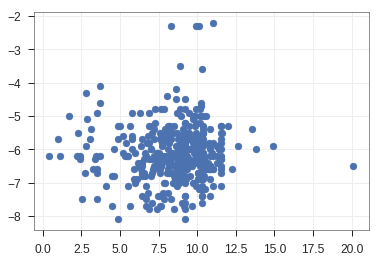

In [291]:
true_affinities = [x['affinity'] for x in do_dock[:len(affinities)]]



/data/home/viktor_petukhov/local/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log1p
  app.launch_new_instance()


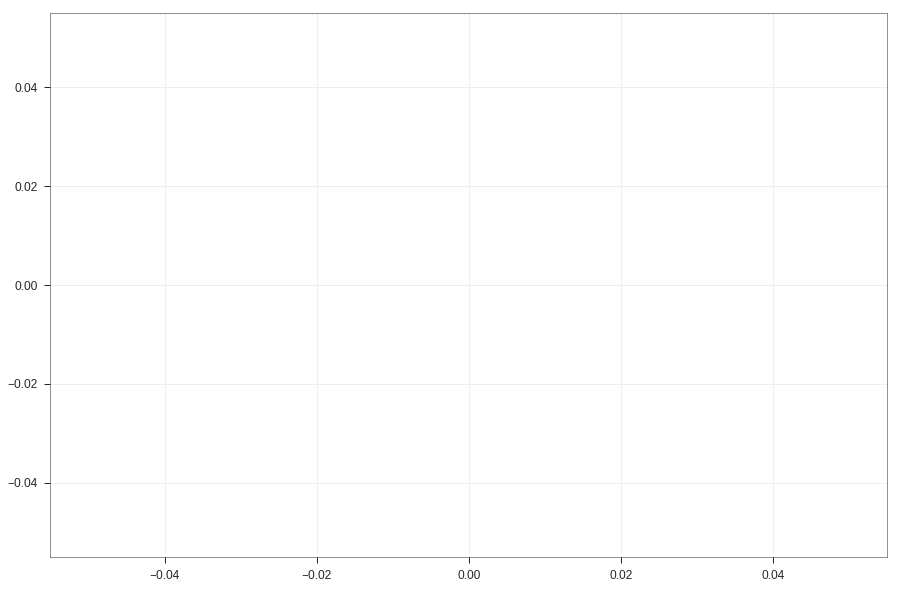

In [293]:
plt.figure(figsize=[15, 10])

plt.scatter(np.log1p(true_affinities), affinities)